# CHALLENGE LATAM AIRLINES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_csv('dataset_SCL.csv', parse_dates = ['Fecha-I','Fecha-O'])
print(DF.shape)

(68206, 18)


D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
DF.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### ANALISIS EXPLORATORIO DE DATOS Y OBSERVACIONES/CONCLUSIONES (PREGUNTA 1)

In [4]:
print(DF['Fecha-I'].dt.year.unique())
print(DF['Fecha-O'].dt.year.unique())

[2017]
[2017 2018]


In [5]:
DF['Fecha-O'].dt.year.value_counts()

2017    68204
2018        2
Name: Fecha-O, dtype: int64

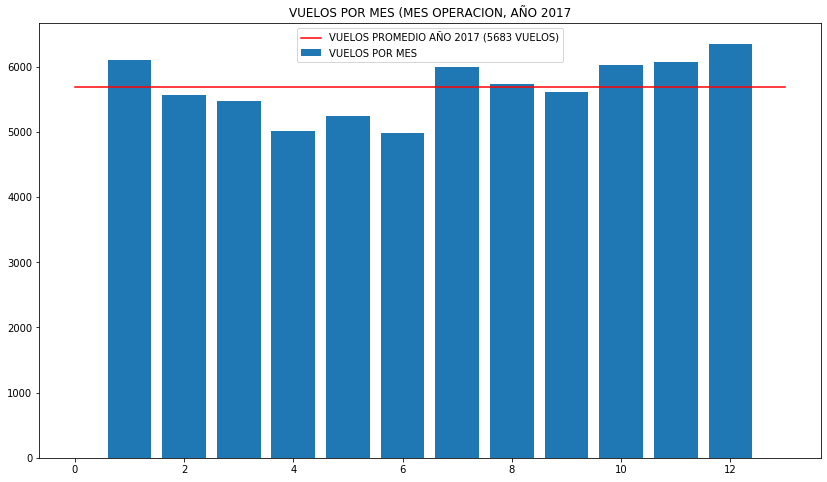

In [6]:
#CANTIDAD DE VUELOS POR MES

PROMEDIO = DF.MES.value_counts().sort_index().mean()
plt.figure(figsize=(14, 8))
plt.bar(DF.MES.value_counts().sort_index().index,DF.MES.value_counts().sort_index().values,label = 'VUELOS POR MES')
plt.plot(PROMEDIO*np.ones(14),label = 'VUELOS PROMEDIO AÑO 2017 ('+str(int(PROMEDIO))+" VUELOS)",color = 'red')
plt.title("VUELOS POR MES (MES OPERACION, AÑO 2017")
plt.legend()

In [9]:
# Mes con mas y menos Vuelos
MAX_M = DF.MES.value_counts().sort_index().max()
MIN_M = DF.MES.value_counts().sort_index().min()

print("Mes con mas vuelos  : "+str(MAX_M))
print("Mes con menos vuelos: "+str(MIN_M))

Mes con mas vuelos  : 6356
Mes con menos vuelos: 4981


In [10]:
# CAntidad de vuelos por mes (valor)
DF.MES.value_counts().sort_index()

1     6108
2     5561
3     5482
4     5020
5     5240
6     4981
7     5992
8     5744
9     5610
10    6032
11    6080
12    6356
Name: MES, dtype: int64

D:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


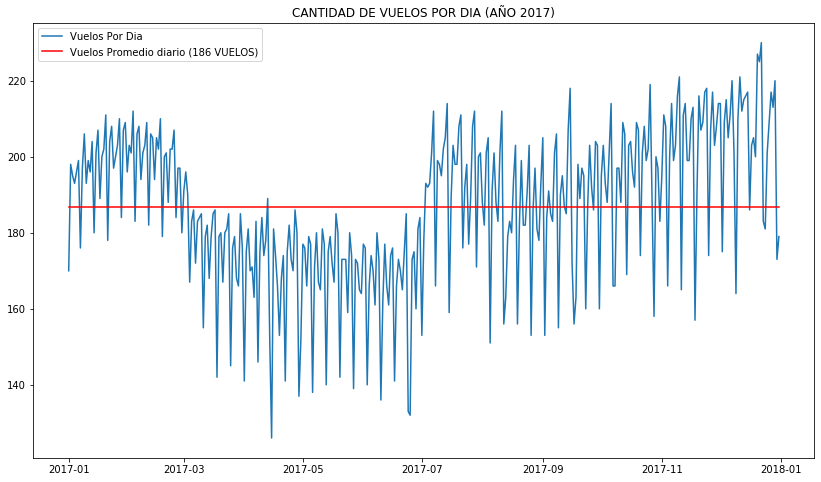

In [11]:
# Cantidad de vuelos Diarios
df = DF.groupby([DF['Fecha-I'].dt.date]).count()['Fecha-I']

plt.figure(figsize=(14, 8))
plt.plot(df, label = 'Vuelos Por Dia')
plt.plot(df.index,df.mean()*np.ones(df.shape[0]),label = 'Vuelos Promedio diario ('+str(int(df.mean()))+" VUELOS)",color = 'red')
plt.title('CANTIDAD DE VUELOS POR DIA (AÑO 2017)')
plt.legend()

In [153]:
# Vuelos diarios promedios. Cantidad de vuelos max y min
print("Maxima cantidad de vuelos diarios: "+str(df.max()))
print("Minima cantidad de vuelos diarios: "+str(df.min()))
print("Promedio de vuelos diarios: "+str(int(df.mean())))

Maxima cantidad de vuelos diarios: 230
Minima cantidad de vuelos diarios: 126
Promedio de vuelos diarios: 186


In [158]:
#Fechas con mas y menos vuelos
print(df[df.values == 230])
print(df[df.values == 126])

Fecha-I
2017-12-22    230
Name: Fecha-I, dtype: int64
Fecha-I
2017-04-15    126
Name: Fecha-I, dtype: int64


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

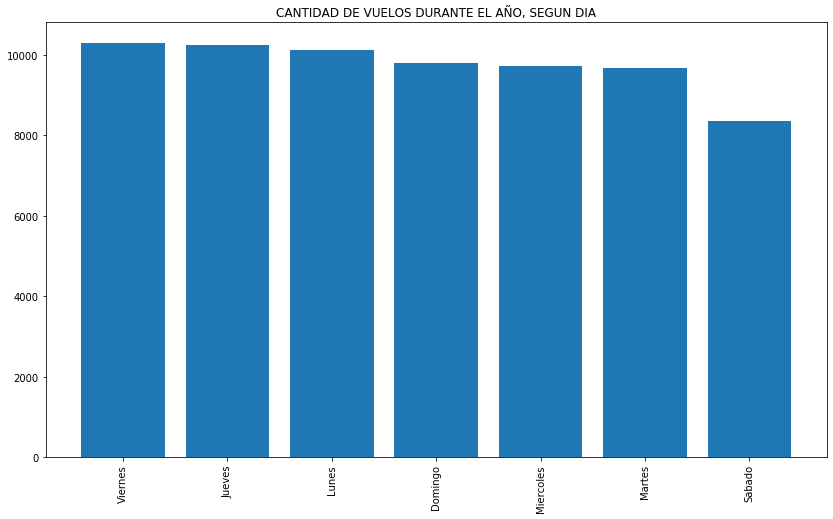

In [14]:
# Cantidad de vuelos por dia
plt.figure(figsize=(14, 8))
plt.bar(DF.DIANOM.value_counts().index,DF.DIANOM.value_counts().values)
plt.title('CANTIDAD DE VUELOS DURANTE EL AÑO, SEGUN DIA')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text xticklabel objects>)

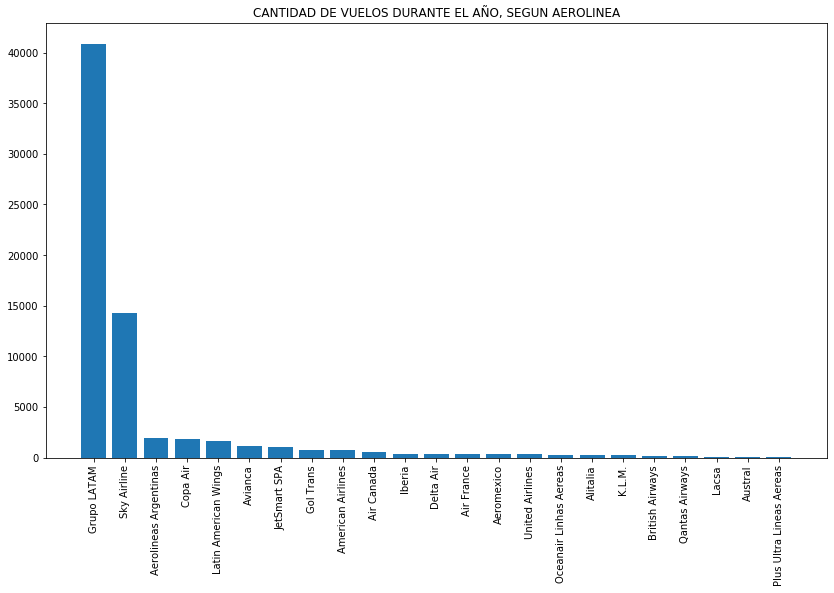

In [15]:
# CAntidad de vuelos por aerolinea
plt.figure(figsize=(14, 8))
plt.bar(DF.OPERA.value_counts().index, DF.OPERA.value_counts().values)
plt.title('CANTIDAD DE VUELOS DURANTE EL AÑO, SEGUN AEROLINEA')
plt.xticks(rotation=90)


In [16]:
REG_LATAM = DF[DF.OPERA == 'Grupo LATAM'].shape[0]/DF.shape[0] * 100
REG_SKY = DF[DF.OPERA == 'Sky Airline'].shape[0]/DF.shape[0] * 100
REG_OTROS = DF[(DF.OPERA != 'Sky Airline')&(DF.OPERA != 'Grupo LATAM')].shape[0]/DF.shape[0] * 100

print('% Vuelos regitrados Grupo LATAM: '+str(int(REG_LATAM))+ " %")
print('% Vuelos regitrados Sky Airline: '+str(int(REG_SKY))+ " %")
print('% Vuelos regitrados Otras Aerolineas: '+str(int(REG_OTROS))+ " %")

% Vuelos regitrados Grupo LATAM: 59 %
% Vuelos regitrados Sky Airline: 20 %
% Vuelos regitrados Otras Aerolineas: 19 %


In [17]:
DF_tmp = DF.copy()
#DIFERENCIA DE TIEMPO EN MINUTOS
DF_tmp['DIFERENCIA'] = ((DF_tmp['Fecha-O'] - DF_tmp['Fecha-I'])/np.timedelta64(60, 's'))

#VUELOS CON ATRASO
DF_tmp['ATRASADO'] = DF_tmp['DIFERENCIA'].apply(lambda x : 1 if x > 0 else 0)

In [18]:
DF_tmp.ATRASADO.value_counts()

1    45507
0    22699
Name: ATRASADO, dtype: int64

In [19]:
# porcentaje vueos atrasados, adelantados y puntuales
print("PORCENTAJE VUELOS CON ATRASO: "+str(int(DF_tmp[DF_tmp['ATRASADO'] == 1].shape[0]/DF_tmp.shape[0] * 100))+"%")
print("PORCENTAJE VUELOS CON ADELANTO: "+str(int(DF_tmp[DF_tmp['DIFERENCIA'] < 0].shape[0]/DF_tmp.shape[0] * 100))+"%")
print("PORCENTAJE VUELOS PUNTUALES: "+str(int(DF_tmp[DF_tmp['DIFERENCIA'] == 0].shape[0]/DF_tmp.shape[0] * 100))+"%")

PORCENTAJE VUELOS CON ATRASO: 66%
PORCENTAJE VUELOS CON ADELANTO: 26%
PORCENTAJE VUELOS PUNTUALES: 7%


In [20]:
# CONTEO DE VUELOS SEGUN TIPO DE VUELO
DF_tmp.TIPOVUELO.value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

In [21]:
# TOP TEN destinos de vuelos 
DF_tmp.SIGLADES.value_counts().head(10)

Buenos Aires    6335
Antofagasta     5786
Lima            5270
Calama          5146
Puerto Montt    4357
Concepcion      3993
Iquique         3747
Sao Paulo       3569
Temuco          2589
Arica           2436
Name: SIGLADES, dtype: int64

In [22]:
TOT_TOP_TEN = DF_tmp.SIGLADES.value_counts().head(10).sum()
PORC_TOP_TEN = TOT_TOP_TEN/DF_tmp.shape[0] * 100
print("PORCENTAJE DE VUEJOS ABARCADOS POR TOP TEN: "+str(int(PORC_TOP_TEN))+"%")

PORCENTAJE DE VUEJOS ABARCADOS POR TOP TEN: 63%


#### OBSERVACIONES GENERALES:

> - Se esta trabajando con los datos del año 2017 y solo hubo 2 vuelos que operaron con retraso pasando a ser vuelos que operaron en el año 2018.

> - La cantidad promedio de vuelos programados en 2017 por mes fue de un tota de 5683. El mes de junio es el que registra menos vuelos con un total de 4981 vuelos y diciembre es el mes con mas vuelos alcanzando un total de 6356 vuelos registrados.

> - La cantidad de vuelos diarios en promedio fueron 186 durante el año 2017, Registrando un maximo de 230 vuelos el dia 22 de Diciembre y 126 vuelos realizados el dia 15 de Abril.

> - Un gran porcentaje de la informacion proviene de registros de aerolineas LATAM abarcando alredededor del 60% de los vuelos aproximadamente, mientras que Sky Airlines es la segunda Aerolinea con mas vuelos alcanzando casi un 20% . Por otro lado, las otras 21 aerolineas existentes componen el 20% restante aproximadamente.

> - El TOP TEN de destinos abarca alrededor del 63% de los vuelos registrados siendo Buenos Aires (6335 vuelos) el destino mas frecuente. Sin embargo, 7 de los 10 destinos mas frecuentes son destinos nacionales con antofagasta (5786 vuelos) liderando el conteo de vuelos, seguido de Calama (5146 vuelos) y Puerto Montt (4357 vuelos). Otra curiosidad es que dentro del TOP TEN solo hay destinos dentro de la zona "Sudamericana".

### CREACION FEATURES ADICIONALES (PREGUNTA 2)

In [23]:
%%time
#ADICION DE FILAS SEGUN DESAFIO

#temporada alta segun fechas del año
DF['temporada_alta'] = DF['Fecha-I'].apply(lambda x: 1 if  (x >= pd.to_datetime('2017-12-15')) & 
                                                           (x <= pd.to_datetime('2017-03-03')) else 
                                                    (1 if  (x >= pd.to_datetime('2017-07-15')) & 
                                                           (x <= pd.to_datetime('2017-07-31')) else 
                                                    (1 if  (x >= pd.to_datetime('2017-09-11')) & 
                                                           (x <= pd.to_datetime('2017-09-30')) else 0)))

#Diferencia de tiempo entre Fecha-I y Fecha-O
DF['dif_min'] = ((DF['Fecha-O'] - DF['Fecha-I'])/np.timedelta64(60, 's'))

#Atraso de mas de 15 minutos
DF['atraso_15'] = DF['dif_min'].apply(lambda x : 1 if x > 15 else 0)

#Periodo dia segun Hora de vuelo Fecha-I
DF['periodo_dia'] = DF['Fecha-I'].dt.hour.apply(lambda x : 'mañana' if ((x >= 5) & (x < 12)) else 
                                                          ('tarde'  if ((x >=12) & (x < 19)) else 'noche'))

Wall time: 30.8 s


In [17]:
##GUARDADO DE FEATURES
##NOTA: SE GUARDARAN ESTOS FEATURES EN 2 VERSIONES: 
##   > "features_synthetic.csv" (SOLO LAS COLUMNAS ADICIONALES) 
##   > "SCL_features_synthetic.csv" (DATASET ANTIGUO MAS COLUMNAS ADICIONALES) 

DF[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('features_synthetic.csv',index = False)
DF.to_csv('SCL_features_synthetic.csv',index = False)

### COMPOSICION DE TASAS DE ATRASO (PREGUNTA 3)

In [177]:
#¿Cómo se compone la tasa de atraso por destino, aerolínea, 
#mes del año, día de la semana, temporada, tipo de vuelo?
#¿Qué variables esperarías que más influyeran en predecir atrasos?

#### ATRASO POR DESTINO

Tasa Atraso Promedio Por Destino: 0.6705452631800269


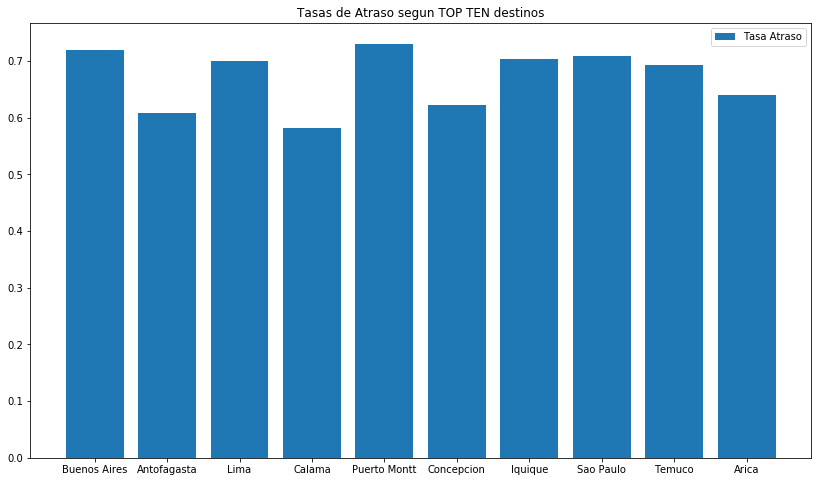

In [218]:
# NOTA: En base al analisis anterior solo se utilizara el TOP TEN de destinos ya que hay mayor 
# cantidad de vuelos comprendidas en estos destinos por lo que este conjunto posee una mayor importancia

DESTINOS_TOP = DF_tmp.SIGLADES.value_counts().head(10).index
TASAS_DEST = []

for i in DESTINOS_TOP:
    ATRASO_TMP_DEST = DF_tmp[(DF_tmp.SIGLADES == i)&(DF_tmp.ATRASADO == 1)].shape[0]
    TOTAL_TMP_DEST = DF_tmp[(DF_tmp.SIGLADES == i)].shape[0]
    TASA_TMP_DEST = ATRASO_TMP_DEST/TOTAL_TMP_DEST
    TASAS_DEST.append(TASA_TMP_DEST)

print("Tasa Atraso Promedio Por Destino: "+str(np.mean(TASAS_DEST)))
plt.figure(figsize=(14, 8))
plt.bar(DESTINOS,TASAS_DEST,label='Tasa Atraso')
plt.title('Tasas de Atraso segun TOP TEN destinos')
plt.legend()

#### ATRASO POR AEROLINEA

Tasa de atraso Grupo LATAM  : 73%
Tasa de atraso Sky Airlines : 58%
Tasa de atraso OTROS        : 53%
Tasa de atraso Promedio     : 0.6200116199222192%


Text(0.5, 1.0, 'Tasa de atraso Por Aerolinea')

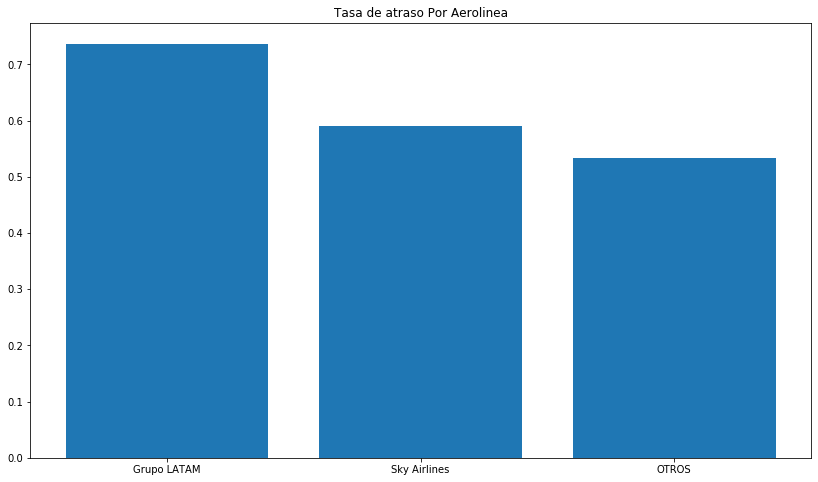

In [241]:
# NOTA: Solo se individualizara a "Grupo LATAM" y "Sky Airlines" debido a que son las aerolineas con mas vuelos. 
# El resto de aerolineas se agrupara bajo la categoria de "OTROS"

ATRASO_LATAM = DF_tmp[(DF_tmp.OPERA == 'Grupo LATAM')&(DF_tmp.ATRASADO == 1)].shape[0]
VUELOS_LATAM = DF_tmp[(DF_tmp.OPERA == 'Grupo LATAM')].shape[0]
TASA_LATAM = ATRASO_LATAM/VUELOS_LATAM 

ATRASO_SKY = DF_tmp[(DF_tmp.OPERA == 'Sky Airline')&(DF_tmp.ATRASADO == 1)].shape[0]
VUELOS_SKY = DF_tmp[(DF_tmp.OPERA == 'Sky Airline')].shape[0]
TASA_SKY = ATRASO_SKY/VUELOS_SKY

ATRASO_OTROS = DF_tmp[(DF_tmp.OPERA != 'Sky Airline')&(DF.OPERA != 'Grupo LATAM')&(DF_tmp.ATRASADO == 1)].shape[0]
VUELOS_OTROS = DF_tmp[(DF.OPERA != 'Sky Airline')&(DF.OPERA != 'Grupo LATAM')].shape[0]
TASA_OTROS = ATRASO_OTROS/VUELOS_OTROS 

print("Tasa de atraso Grupo LATAM  : " + str(int(TASA_LATAM*100))+"%")
print("Tasa de atraso Sky Airlines : " + str(int(TASA_SKY*100))+"%")
print("Tasa de atraso OTROS        : " + str(int(TASA_OTROS*100))+"%")
print("Tasa de atraso Promedio     : " + str(np.mean([TASA_LATAM,TASA_SKY,TASA_OTROS]))+"%")

plt.figure(figsize=(14, 8))
plt.bar(['Grupo LATAM','Sky Airlines','OTROS'], [TASA_LATAM,TASA_SKY,TASA_OTROS])
plt.title("Tasa de atraso Por Aerolinea")

#### ATRASO POR MES EL AÑO

Tasa Atraso Promedio Por Mes: 0.6642386088647986


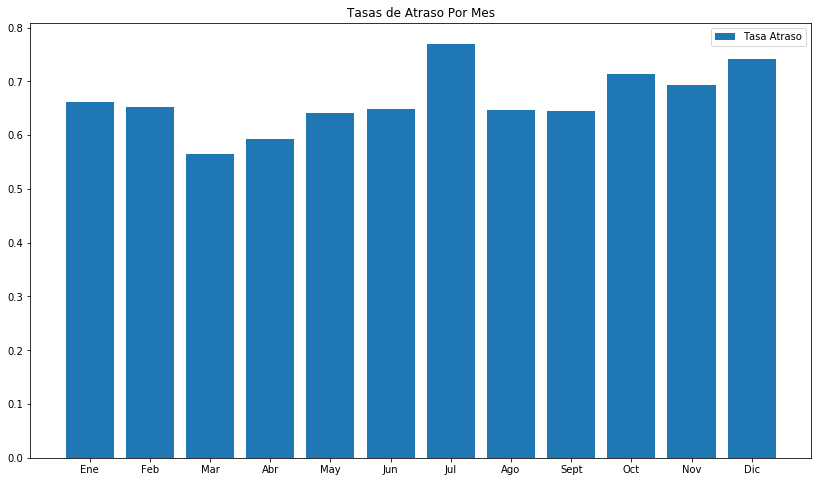

In [220]:
#DF_tmp[DF_tmp.MES == 1]
MES = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sept','Oct','Nov','Dic']
TASA_MES = []

for i in range(1,13):
    ATRASO_TMP_MES = DF_tmp[(DF_tmp.MES == i) & (DF_tmp.ATRASADO == 1)].shape[0]
    TOTAL_TMP_MES = DF_tmp[(DF_tmp.MES == i)].shape[0]
    TASA_TMP_DEST = ATRASO_TMP_MES/TOTAL_TMP_MES
    
    TASA_MES.append(TASA_TMP_DEST)

print("Tasa Atraso Promedio Por Mes: "+str(np.mean(TASA_MES)))
plt.figure(figsize=(14, 8))
plt.bar(MES,TASA_MES,label='Tasa Atraso')
plt.title('Tasas de Atraso Por Mes')
plt.legend()
    

#### ATRASO POR DIA DE LA SEMANA

Tasa Atraso Promedio Por Dia: 0.6661868080096084


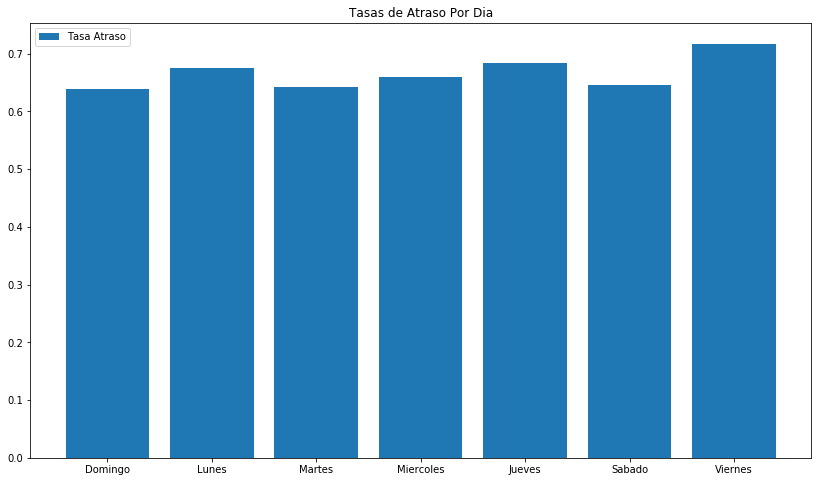

In [227]:
DIAS = DF_tmp.DIANOM.unique()

TASA_DIAS = []

for i in DIAS:
    ATRASO_TMP_DIAS = DF_tmp[(DF_tmp.DIANOM == i) & (DF_tmp.ATRASADO == 1)].shape[0]
    TOTAL_TMP_DIAS = DF_tmp[(DF_tmp.DIANOM == i)].shape[0]
    TASA_TMP_DIAS = ATRASO_TMP_DIAS/TOTAL_TMP_DIAS
    
    TASA_DIAS.append(TASA_TMP_DIAS)

print("Tasa Atraso Promedio Por Dia: "+str(np.mean(TASA_DIAS)))
plt.figure(figsize=(14, 8))
plt.bar(DIAS,TASA_DIAS,label='Tasa Atraso')
plt.title('Tasas de Atraso Por Dia')
plt.legend()

#### ATRASO POR TEMPORADA

Tasa Atraso Temporada Alta: 0.6947352677236015
Tasa Atraso Temporada Baja: 0.6642067620286086


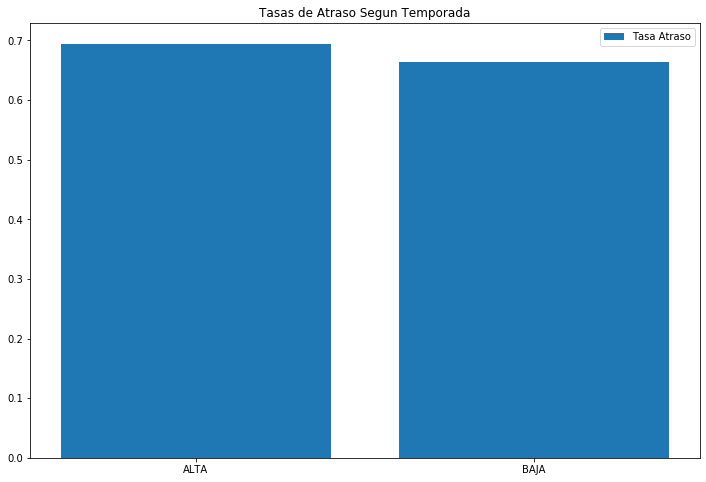

In [233]:
TEMPORADA = ['ALTA','BAJA']

TASA_TEMPORADA = []

ATRASO_TMP_ALTA = DF_tmp[(DF_tmp.temporada_alta == 1) & (DF_tmp.ATRASADO == 1)].shape[0]
TOTAL_TMP_ALTA = DF_tmp[(DF_tmp.temporada_alta == 1)].shape[0]
TASA_TMP_ALTA = ATRASO_TMP_ALTA/TOTAL_TMP_ALTA

ATRASO_TMP_BAJA = DF_tmp[(DF_tmp.temporada_alta == 0) & (DF_tmp.ATRASADO == 1)].shape[0]
TOTAL_TMP_BAJA = DF_tmp[(DF_tmp.temporada_alta == 0)].shape[0]
TASA_TMP_BAJA = ATRASO_TMP_BAJA/TOTAL_TMP_BAJA
    

print("Tasa Atraso Temporada Alta: "+str(TASA_TMP_ALTA))
print("Tasa Atraso Temporada Baja: "+str(TASA_TMP_BAJA))
plt.figure(figsize=(12, 8))
plt.bar(TEMPORADA,[TASA_TMP_ALTA,TASA_TMP_BAJA],label='Tasa Atraso')
plt.title('Tasas de Atraso Segun Temporada')
plt.legend()

#### ATRASO POR TIPO DE VUELO

Tasa Atraso Temporada Alta: 0.6785211267605634
Tasa Atraso Temporada Baja: 0.6576313369041822


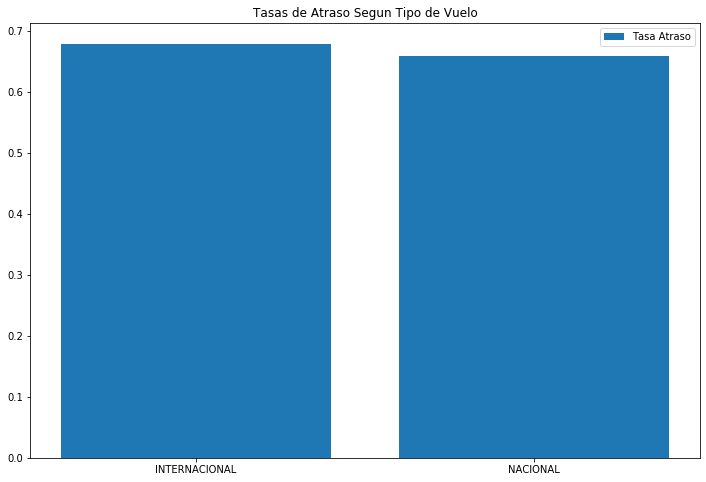

In [236]:
TEMPORADA = ['INTERNACIONAL','NACIONAL']

TASA_TEMPORADA = []

ATRASO_TMP_INT = DF_tmp[(DF_tmp.TIPOVUELO == 'I') & (DF_tmp.ATRASADO == 1)].shape[0]
TOTAL_TMP_INT = DF_tmp[(DF_tmp.TIPOVUELO == 'I')].shape[0]
TASA_TMP_INT = ATRASO_TMP_INT/TOTAL_TMP_INT

ATRASO_TMP_NAC = DF_tmp[(DF_tmp.TIPOVUELO == 'N') & (DF_tmp.ATRASADO == 1)].shape[0]
TOTAL_TMP_NAC = DF_tmp[(DF_tmp.TIPOVUELO == 'N')].shape[0]
TASA_TMP_NAC = ATRASO_TMP_NAC/TOTAL_TMP_NAC
    

print("Tasa Atraso Temporada Alta: "+str(TASA_TMP_INT))
print("Tasa Atraso Temporada Baja: "+str(TASA_TMP_NAC))
plt.figure(figsize=(12, 8))
plt.bar(TEMPORADA,[TASA_TMP_INT,TASA_TMP_NAC],label='Tasa Atraso')
plt.title('Tasas de Atraso Segun Tipo de Vuelo')
plt.legend()

#### ¿QUÉ VARIABLES SE ESPERA QUE SEAN MAS INFLUYENTES PARA PREDECIR ATRASOS?

> - Las caracteristicas que son solicitadas para medir las distintas tasas de atraso son bastante cercanas entre si ya que la gran mayoria se encuentra en valores de alrededor del 60-70 %. En cierta forma estas variables indican que son las necesarias para predecir atrasos. Sin embargo, algunos datos adicionales que podrian ser relevante son datos alusivos a las caracteristicas de los aviones ya que con esto se puede calcular probabilidad de fallas y que puede influir en que un vuelo se retrase. Esta caracteristica esta mas relacionada con el aspecto "tecnico" de los aviones asignados a los vuelos y no esta tan orientado a la "temporalidad" de un vuelo y talvez seria interesante desarrollar un modelo con estos datos (si es que estan disponibles por supuesto) y poder contestar preguntas como "¿Que tan probable es que falle un avion en una determinada estacion del año (y por consecuencia exista un retraso por "dificultades tecnicas")?".

> - Otro detalle impotante a explorar de estas 6 caracteristicas es la combinacion de estas y evaluar las tasas en un nivel combinado como por ejemplo: "tasa por dia de Diciembre para los vuelos internacionales". ya que al combinar se puede tener una hiperpersonalizacion mas interesante desde el punto de vista del analisis y asi entender el problema en todo su espectro.

>> - En este caso particular no existe una diferencia muy "notable" en las tasas de atraso segun tipo de vuelo y temporada a nivel global de los datos, pero si existen diferencias relevantes segun la aerolinea, el mes del año y los destinos por lo que seria relevante hacer un analisis mas personalizado bajo esa premisa.

### PROPUESTA DE MODELO DE PREDICCION DE ATRASOS (PREGUNTAS 4)